Привет!  меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Приятно было проверять твою работу
- Я оставил некоторые советы, обрати на них внимание. Надеюсь они будут полезными или интересными
- Есть маленькие в работе, но я думаю ты быстро и легко их поправишь
- Давай еще разок

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек 
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!

<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Установка-и-импорт-библиотек" data-toc-modified-id="Установка-и-импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Установка и импорт библиотек</a></span></li><li><span><a href="#Объявление-функций" data-toc-modified-id="Объявление-функций-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Объявление функций</a></span></li><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Подготовка-данных-к-обучению-моделей" data-toc-modified-id="Подготовка-данных-к-обучению-моделей-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка данных к обучению моделей</a></span></li><li><span><a href="#Облако-слов" data-toc-modified-id="Облако-слов-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Облако слов</a></span></li><li><span><a href="#Выводы-по-подготовке" data-toc-modified-id="Выводы-по-подготовке-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Выводы по подготовке</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#SGD" data-toc-modified-id="SGD-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>SGD</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Сравнение моделей</a></span></li><li><span><a href="#Выводы-по-обучению-моделей" data-toc-modified-id="Выводы-по-обучению-моделей-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы по обучению моделей</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Итоговые выводы</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Установка и импорт библиотек

In [1]:
# Устанавливаем недостающие библиотеки
!pip install wordcloud
!pip install stop-words
!pip install textblob
!pip install Pillow==8.0.0
!python -m textblob.download_corpora
!/opt/conda/bin/python -m pip install wordcloud==1.8.2.2

# Импортируем все необходимые нам библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
from pymystem3 import Mystem
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import f1_score, recall_score
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
import warnings
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from textblob import TextBlob, Word
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package brown to /home/jovyan/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /home/jovyan/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте
</div>

In [2]:
# Активируется по окончанию проекта
# Проигнорируем предупреждения о возможных изменения работы функций в будущих версиях в Pandas
warnings.filterwarnings("ignore") 

In [3]:
# Зафиксируем константы
RANDOM_STATE = 42
cv_count = 3

### Объявление функций

In [4]:
# Объявляем функцию для изучения всей информации об датафрейме
def df_review(df):
    print('Краткое содержание датафрейма')
    display(df.head(10))
    print('='*100)    
    print('Информация о датафрейме')
    df.info()
    print('='*100)   
    print('Размер датафрейма:', df.shape)
    print('='*100)  
    print('Количество явных дубликатов в датафрейте:', df.duplicated().sum())
    print('Количество пропусков в датафрейте:', '\n', df.isna().sum())
    
# Объявляем функцию конвертизации тегов
def get_wordnet_pos(tag: str) -> str:
    if tag.startswith('N'):
        return 'n'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('J'):
        return 'a'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'
    
# Объявим функцию лемматизации текста
def lemma_blob(text: str) -> str:
    blob = TextBlob(text)
    lemmatized_words = []
    
    for word, tag in blob.tags:
        pos = get_wordnet_pos(tag)
        lemmatized = word.lemmatize(pos)
        lemmatized_words.append(lemmatized)
    
    return " ".join(lemmatized_words)


<div class="alert alert-block alert-danger">
    
<b>Ошибка:</b>  Для более корректной работы  TextBlob, в метод `lemmatize` желательно передавать  POS-тег  (part of speech) для слова. https://textblob.readthedocs.io/en/dev/quickstart.html#part-of-speech-tagging
    
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий студента:</b>
    
Исправил.
    
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍 Есть контакт
</div>


### Загрузка и изучение данных

In [5]:
# Загружаем данные с возможностью загрузить их с сервера в случае недоступности локальных файлов
try:
    df = pd.read_csv('/datasets/toxic_comments.csv', index_col='Unnamed: 0')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv', index_col='Unnamed: 0')  

In [6]:
# Изучаем датафрейм
df_review(df)

Краткое содержание датафрейма


,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


Информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB
Размер датафрейма: (159292, 2)
Количество явных дубликатов в датафрейте: 0
Количество пропусков в датафрейте: 
 text     0
toxic    0
dtype: int64


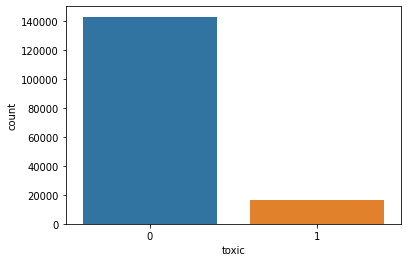

In [7]:
# Проверим баланс данных по целевому признаку
sns.countplot(x = 'toxic', data = df);

*По графику видно явный дисбаланс классов. F1-мера зависима от баланса классов, потому нужно учесть балансировку при обучении моделей.*



<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что обнаружен дисбаланс - это очень важно в задачах калссификации
</div>

### Подготовка данных к обучению моделей

In [8]:
# Лемматизируем текст комментариев
df['lemmatize_text'] = df['text'].apply(lambda x: lemma_blob(x))

In [9]:
# Проверим датафрейм
df.head()

,text,toxic,lemmatize_text
0,Explanation\nWhy the edits made under my usern...,0,Explanation Why the edits make under my userna...
1,D'aww! He matches this background colour I'm s...,0,D'aww He match this background colour I 'm see...
2,"Hey man, I'm really not trying to edit war. It...",0,Hey man I 'm really not try to edit war It 's ...
3,"""\nMore\nI can't make any real suggestions on ...",0,More I ca n't make any real suggestion on impr...
4,"You, sir, are my hero. Any chance you remember...",0,You sir be my hero Any chance you remember wha...


In [10]:
# Уберём из датафрейма нелемматизированный текст
df = df.drop(['text'], axis=1)


<div class="alert alert-block alert-info">
<b>Совет: </b> Можно было бы вывести результаты до/после - было бы информативно
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий студента:</b>
    
Исправил.
    
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>


In [11]:
# Отделим целевой признак от датафрейма
X = df.drop(['toxic'], axis=1)
y = df['toxic']

In [12]:
# Разеделим датафрейм на тренировочную и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=RANDOM_STATE)

# Отделим от валидационной выборки тестовую выборку
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=RANDOM_STATE)

In [13]:
# Вычисляем TF-IDF для корпуса текстов
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stopwords) # вызов TF-IDF

X_train = count_tf_idf.fit_transform(X_train['lemmatize_text'])
X_valid = count_tf_idf.transform(X_valid['lemmatize_text'])
X_test = count_tf_idf.transform(X_test['lemmatize_text'])
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(95575, 132287)
(31858, 132287)
(31859, 132287)



<div class="alert alert-block alert-success">

<b>Успех:</b> Хорошо, что векторизатор обучен только на обучающей выборке - это уменьшает переобучение 
</div>

### Облако слов

In [14]:
# Создаём датафреймы с токсичными и не токсичными комментариями
df_toxic = df[df['toxic']==1]
df_not_toxic = df[df['toxic']==0]

(-0.5, 399.5, 199.5, -0.5)

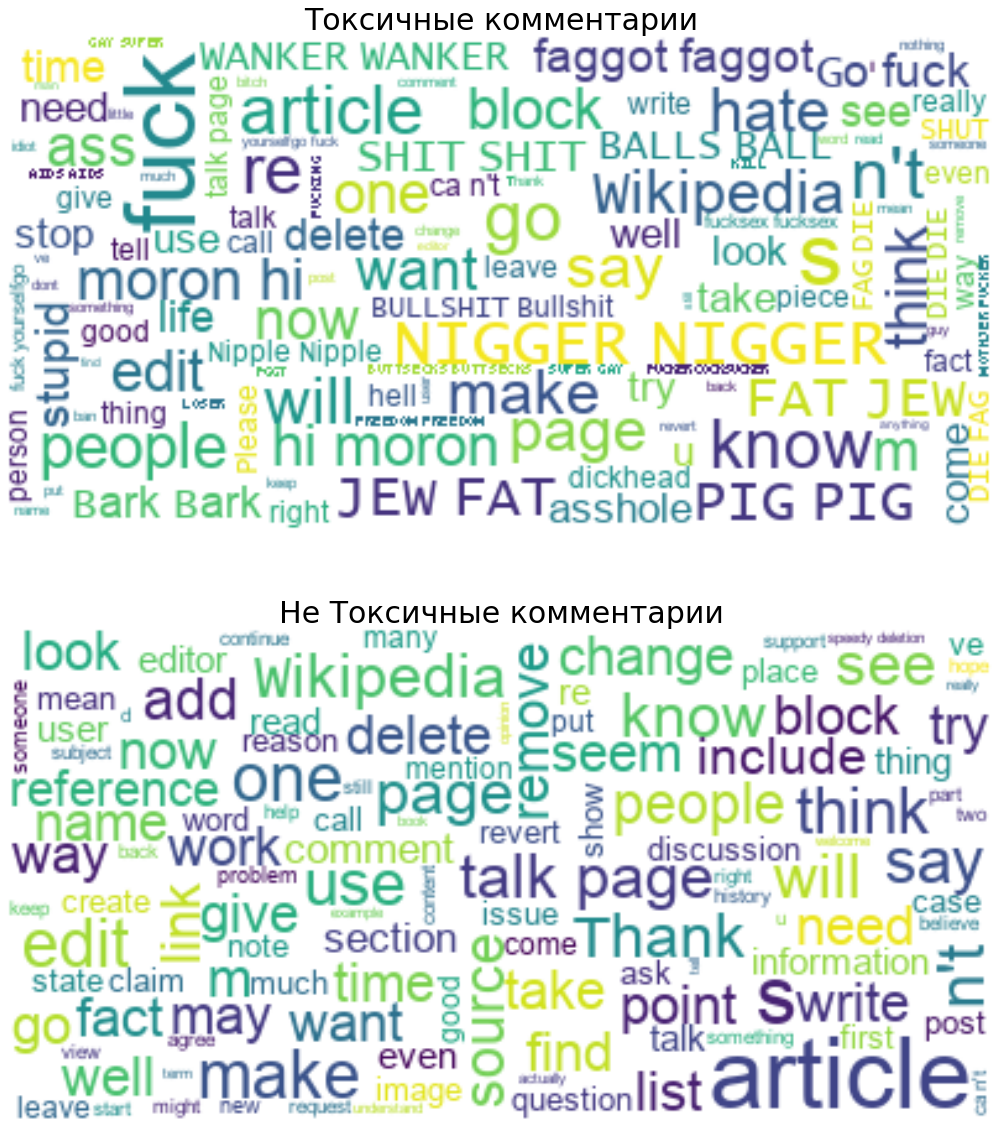

In [28]:
# Создаём облака слов токсичных и не токсичных комментариев
toxic = " ".join(review for review in df_toxic.lemmatize_text)
not_toxic = " ".join(review for review in df_not_toxic.lemmatize_text)

fig, ax = plt.subplots(2, 1, figsize  = (20,20))
wordcloud_toxic = WordCloud(font_path='arial.ttf',
                            max_font_size=40, 
                            max_words=120, 
                            background_color="white").generate(toxic)
wordcloud_not_toxic = WordCloud(font_path='arial.ttf',
                                max_font_size=40, 
                                max_words=120, 
                                background_color="white").generate(not_toxic)

ax[0].imshow(wordcloud_toxic, interpolation='bilinear')
ax[0].set_title('Токсичные комментарии',fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_not_toxic, interpolation='bilinear')
ax[1].set_title('Не Токсичные комментарии',fontsize=30)
ax[1].axis('off')

### Выводы по подготовке

Во время подготовки было сделно:
* Данные загружены и проверены:
  * Пропусков н6е обнаружено
  * Дубликатов не обнаружено
  * Замечен бисбаланс классов
  * Предобработка данных не требуется
* Данные подготовлены к обучению моделей
  * Комментарии лемматизированы
  * Целевой признак отделён
  * Данные поделены на тренировочную, валидационную и тестовую выборки
  * Проведена оценка важности слов


<div class="alert alert-block alert-info">
    
<b>Совет:</b> 
    
    
	





- после очистки и лемматизации (и убрав стопслова) можно провести частотный анализ текста/[облако слов](https://habr.com/ru/post/517410/) - чтобы получить общее представление о тематике и о наиболее часто встречаемых словах в токсичных и нетоксичных твитах Кроме того графики, рисунки делают проект визуально интересней

В тренажере облако импортируем так

    !/opt/conda/bin/python -m pip install wordcloud


или

    !/opt/conda/bin/python -m pip install wordcloud==1.8.2.2


И возможно дополнительно надо будет сделать



    !pip install Pillow==8.0.0
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий студента:</b>
    
Да, я читал про облака слов, но почему-то у меня возникла проблема со шрифтом, потому удалил код. Я вернул код на место чуть выше, если поможешь с этой проблемой - буду крайне благодарен.    
    
**UPD: Запустил код повторно перед отправкой, ошибка ушла сама по себе...интересно, но ладно. Исправил.**
    
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Я думаю это может быть связано с какими-то конфликтами версий на платформе, локальнее должно быть стабильнее
</div>


## Обучение

*Для обучения выберем 3 модели:*

* **CatBoost**
* **SGD**
* **LogisticRegression**

In [16]:
# Создадим таблицу сравнения характеристик моделей
сomparison = pd.DataFrame(columns=['Модель', 
                                   'F1-мера на тренировочной выборке', 
                                   'F1-мера на валидационной выборке'])

### CatBoost

In [17]:
model_CatBoost = CatBoostClassifier(auto_class_weights='Balanced', verbose=False, iterations=200)
model_CatBoost.fit(X_train, y_train)
f1_CatBoost = cross_val_score(model_CatBoost,
                         X_train, 
                         y_train, 
                         cv=cv_count, 
                         scoring='f1').mean()
print('F1-мера на тренировочной выборке:', f1_CatBoost)

F1-мера на тренировочной выборке: 0.7388789197153492



<div class="alert alert-block alert-info">
<b>Совет: </b> У Catboost есть внутренний метод обработки текстовых данных, который можно было бы попробовать
</div>

In [18]:
CatBoost_pred = model_CatBoost.predict(X_valid)
f1_CatBoost_valid = f1_score(y_valid, CatBoost_pred)
print('F1-мера на валидационной выборке:', f1_CatBoost_valid)

F1-мера на валидационной выборке: 0.7320061255742726


In [19]:
сomparison.loc[0] = ['CatBoost', f1_CatBoost, f1_CatBoost_valid]

### SGD

In [20]:
model_SGD = SGDClassifier()
params = [{'loss':['hinge', 'log', 'modified_huber'],
                'learning_rate':['constant', 'optimal', 'invscaling', 'adaptive'],
                'eta0':[0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                'random_state':[RANDOM_STATE],
                'class_weight':['balanced']}]


clf = GridSearchCV(model_SGD, params, scoring='f1', cv=cv_count)
clf.fit(X_train, y_train)
SGD_best_params = clf.best_params_
print("Лучшие параметры модели:")
print(SGD_best_params)
means = clf.cv_results_['mean_test_score']

Лучшие параметры модели: /n
{'class_weight': 'balanced', 'eta0': 0.3, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'random_state': 42}


<div class="alert alert-block alert-info">
<b>Совет: </b>  Также напомню, что внутри кросс-валидации происходих разбиение выборки на треин и валидацию. Однако, в таком случае векторизатор обучен на всей выборке, а это не совсем корректно. Для избежания такого эффекта можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">пайплайн</a>.
</div>


In [21]:
f1_SGD_train = max(means)
model_SGDC = SGDClassifier()
model_SGDC.set_params(**SGD_best_params)
model_SGDC.fit(X_train, y_train)
SGDC_pred = model_SGDC.predict(X_valid)
f1_SGDC_valid = f1_score(y_valid, SGDC_pred)
print('F1-мера на тренировочной выборке:', f1_SGD_train)
print('F1-мера на валидационной выборке:', f1_SGDC_valid)

F1-мера на тренировочной выборке: 0.7496745785893989
F1-мера на валидационной выборке: 0.7349938750510412


In [22]:
сomparison.loc[1] = ['SGD', f1_SGD_train, f1_SGDC_valid]

### LogisticRegression

In [23]:
model_LR = LogisticRegression()
param = [{'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'C':[0.1, 1, 10],
                'class_weight':['balanced']}]

clf_2 = GridSearchCV(model_LR, param, scoring='f1',cv=cv_count)
clf_2.fit(X_train, y_train)
LR_best_params = clf_2.best_params_
print("Лучшие параметры:")
print(LR_best_params)
means_LR = clf_2.cv_results_['mean_test_score']

Лучшие параметры: /n
{'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}


In [24]:
f1_LR_train = max(means_LR)
modelLR = LogisticRegression()
modelLR.set_params(**LR_best_params)
modelLR.fit(X_train, y_train)
LR_pred = modelLR.predict(X_valid)
f1_LR_valid = f1_score(y_valid, LR_pred)
print('F1-мера на тренировочной выборке:', f1_LR_train)
print('F1-мера на валидационной выборке:', f1_LR_valid)

F1-мера на тренировочной выборке: 0.7585905674469889
F1-мера на валидационной выборке: 0.7491289198606271


In [25]:
сomparison.loc[2] = ['LogisticRegression', f1_LR_train, f1_LR_valid]

###  Сравнение моделей

In [26]:
# Выведем получившуюся таблицу сравнения моделец
сomparison

,Модель,F1-мера на тренировочной выборке,F1-мера на валидационной выборке
0,CatBoost,0.738879,0.732006
1,SGD,0.749675,0.734994
2,LogisticRegression,0.758591,0.749129


### Выводы по обучению моделей

Лучшей и единственной подходящей под требования моделью стала **LogisticRegression** с показанием F1-меры на валидационной выборке **0,75**.


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично проделан шаг
    
- Радует количество рассмотренных моделей.   
- Кросс-валидационные методы успешно использованы. 
- Выбор лучшей модели обоснован. 
- Всегда приятно наблюдать информативную таблицу.
</div>


## Выводы

### Проверка модели на тестовой выборке

In [27]:
test_pred = modelLR.predict(X_test)
print('F1-мера лучшей модели:', f1_score(y_test, test_pred))

F1-мера лучшей модели: 0.7555686679451246


Модель **LogisticRegression** полностью соответствует требованиям.


<div class="alert alert-block alert-success">
<b>Успех:</b> На тестовой выборке получено хорошее качество!
</div>


### Итоговые выводы

Во время работы над проектом было сделано:
* Подготовка:    
  * Данные загружены и проверены:
    * Пропусков н6е обнаружено
    * Дубликатов не обнаружено
    * Замечен бисбаланс классов
    * Предобработка данных не требуется
  * Данные подготовлены к обучению моделей
    * Комментарии лемматизированы
    * Целевой признак отделён
    * Данные поделены на тренировочную, валидационную и тестовую выборки
    * Проведена оценка важности слов
* Обучение:
  * Обучены 3 модели:
    * **CatBoost**
    * **SGD**
    * **LogisticRegression**
  * Было проведено сравнение моделей по F1-мере
  * Была выбрана лучшая модель **LogisticRegression** с показанием F1-меры на валидационной выборке равным **0,76**
* По результатам проверки на тестовой выборке лучшая модель показала F1-меру равной **0,76**, что полностью соответствует требованиям проекта.



<div class="alert alert-block alert-success">
<b>Успех:</b> Всегда приятно наблюдать подробный и структурированный итоговый вывод в конце работы!
</div>


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [X]  Весь код выполняется без ошибок
- [X]  Ячейки с кодом расположены в порядке исполнения
- [X]  Данные загружены и подготовлены
- [X]  Модели обучены
- [X]  Значение метрики *F1* не меньше 0.75
- [X]  Выводы написаны

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий студента:</b>
    
Привет, Люман. Спасибо, что проверяешь мой проект. Я исправил критическую ошибку и поработал над некоторыми замечаниями. Если я не ответил на какое-то замечание - я обязательно попробую это учесть в будущем. Спасибо за все советы и дополнительный материал, это поможет мне стать лучше.
    
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 🤝
</div>

